#### **Escuela Politécnica Nacional**
#### **Proyecto BlackBox**
#### **Integrantes:**
#### - Sebastian Morales
#### - Moisés Pineda

##### **Carga del modelo**

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from Blackbox import load_model
model = load_model()
model

[06-15 19:30:05][INFO] c:\Users\santi\OneDrive\Documentos\GitHub\Github1.0\Proyecto_IBimestre\Blackbox\blackbox.py
[06-15 19:30:05][INFO] 2025-06-15 19:30:05.674506
Current working directory: c:\Users\santi\OneDrive\Documentos\GitHub\Github1.0\Proyecto_IBimestre


<Sequential name=sequential_14, built=True>

##### **Pruebas con el modelo**

In [3]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_point(model, 0.2, 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


np.float32(1.0)

In [4]:
predict_point(model, 1.1, 1.3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


np.float32(0.0)

In [5]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_batch(model, [0.2, 1.1], [0.4, 1.3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


[1.0, 0.0]

##### **Obtención de los puntos donde el modelo da de resultado 1**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1

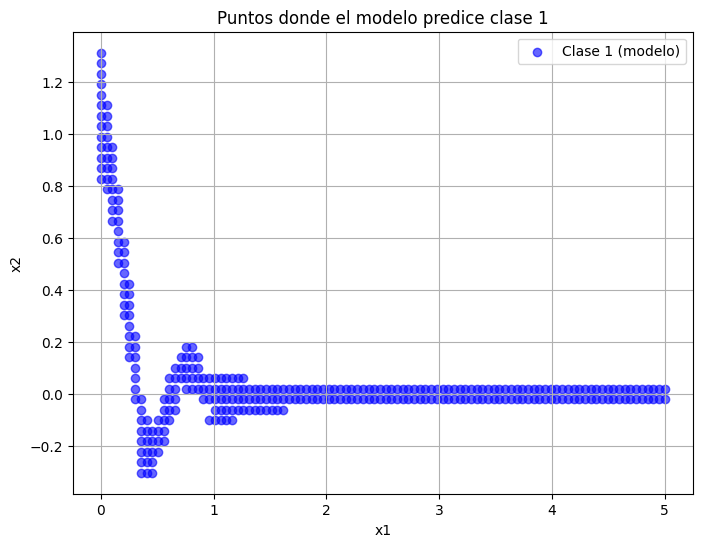

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores para x1 y x2
x1_vals = np.linspace(0, 5, 100)
x2_vals = np.linspace(-2, 2, 100)

# Listas para almacenar solo los puntos donde el modelo predice 1
x1_positivos = []
x2_positivos = []

for x1 in x1_vals:
    for x2 in x2_vals:
        if predict_point(model, x1, x2) == 1.0:
            x1_positivos.append(x1)
            x2_positivos.append(x2)

plt.figure(figsize=(8, 6))
plt.scatter(x1_positivos, x2_positivos, color='blue', alpha=0.6, label='Clase 1 (modelo)')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Puntos donde el modelo predice clase 1")
plt.grid(True)
plt.legend()
plt.show()

##### **Buscando una función que se aproxime a cuando el modelo da un resultado de 1, mediante mínimos cuadrados.**

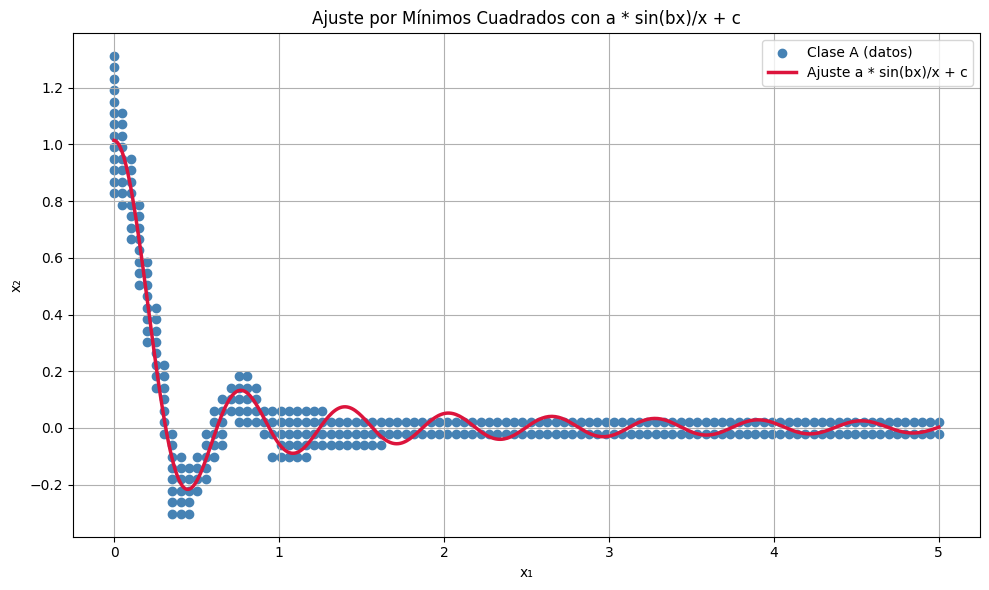


Función ajustada:
  x₂(x) ≈ (0.10066)·sin(10.05000·x)/x + (0.00285)


In [7]:
from scipy.optimize import curve_fit

# Datos reales
x1 = np.array(x1_positivos)
x2 = np.array(x2_positivos)

# Modelo basado en a * sin(bx)/x + c
def modelo_sinc(x, a, b, c):
    x = np.where(x == 0, 1e-6, x)  # Evitar división por cero
    return a * np.sin(b * x) / x + c

# Ajustar el modelo
params, _ = curve_fit(
    modelo_sinc,
    x1,
    x2,
    p0=(1, 1, 0),  # valores iniciales: a, b, c
    maxfev=10000
)

# Valores ajustados
x_fit = np.linspace(min(x1), max(x1), 500)
y_fit = modelo_sinc(x_fit, *params)

# Graficar resultado
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, color='steelblue', label='Clase A (datos)')
plt.plot(x_fit, y_fit, color='crimson', linewidth=2.5, label='Ajuste a * sin(bx)/x + c')
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Ajuste por Mínimos Cuadrados con a * sin(bx)/x + c")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar la función ajustada
a, b, c = params
print(f"\nFunción ajustada:\n  x₂(x) ≈ ({a:.5f})·sin({b:.5f}·x)/x + ({c:.5f})")

##### **Prototipo de la interfaz**

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np

# Lista para guardar los puntos (x1, x2, clase)
puntos = []

def funcion_solucion(x):
    x_safe = np.where(x == 0, 1e-6, x)  # Para evitar división por cero
    return 0.10066 * np.sin(10.05 * x_safe) / x_safe + 0.00285

# Estado para controlar si la curva de la función se muestra en la gráfica
mostrar_funcion = True

# Función para predecir, guardar y graficar
def predecir_y_graficar(x1, x2):
    clase = predict_point(model, x1, x2)
    puntos.append((x1, x2, clase))
    dibujar_grafica()
    print(f"Entrada: x1 = {x1}, x2 = {x2} → Clase predicha: {clase}")

# Función para redibujar todos los puntos y función según estado mostrar_funcion
def dibujar_grafica():
    clear_output(wait=True)  # Limpia la celda anterior
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_title("Plano x1 vs x2 con clasificación de la Red Neuronal y función solución")
    ax.set_xlabel("x1")
    ax.set_ylabel("x2 / función solución")
    ax.grid(True)

    # Graficar la función solucion para x en [0,4] solo si mostrar_funcion es True
    if mostrar_funcion:
        x_vals = np.linspace(0, 4, 400)
        y_vals = funcion_solucion(x_vals)
        ax.plot(x_vals, y_vals, label="funcion_solucion(x1)", color='green', linewidth=2)

    # Graficar cada punto según su clase
    for x1, x2, clase in puntos:
        color = 'blue' if clase == 1.0 else 'red'
        ax.plot(x1, x2, 'o', color=color)

    # Establecer límites fijos para evitar cambios al mostrar/ocultar función
    ax.set_xlim(0, 4)
    ax.set_ylim(-0.3, 1.2)

    if mostrar_funcion:
        ax.legend()
    plt.show()

    # Volver a mostrar widgets después del clear_output
    display(x1_input, x2_input, boton_evaluar, boton_mostrar, boton_ocultar)

# Widgets de entrada
x1_input = widgets.BoundedFloatText(
    description='x1:',
    value=0.0,
    min=0.0,
    max=4.0,
    step=0.01,
    continuous_update=False
)
x2_input = widgets.BoundedFloatText(
    description='x2:',
    value=0.0,
    min=-0.3,
    max=1.2,
    step=0.01,
    continuous_update=False
)
boton_evaluar = widgets.Button(description="Evaluar")
boton_mostrar = widgets.Button(description="Mostrar función")
boton_ocultar = widgets.Button(description="Ocultar función")

# Función para manejar el clic, con restricción de x1
def on_click_evaluar(b):
    x1_val = x1_input.value
    x2_val = x2_input.value
    if x1_val < 0 or x1_val > 4:
        print("❌ Error: El valor de x1 debe ser mayor a cero y en el rango de 0 y 4.")
        return  # No limpiar la salida, solo mostrar el mensaje
    if x2_val < -0.3 or x2_val > 1.2:
        print("❌ Error: El valor de x2 debe estar entre -0.3 y 1.2, para que se pueda ver")
        return
    try:
        predecir_y_graficar(x1_val, x2_val)
    except Exception as e:
        print(f"Error: {e}")

def on_click_mostrar(b):
    global mostrar_funcion
    mostrar_funcion = True
    dibujar_grafica()

def on_click_ocultar(b):
    global mostrar_funcion
    mostrar_funcion = False
    dibujar_grafica()

boton_evaluar.on_click(on_click_evaluar)
boton_mostrar.on_click(on_click_mostrar)
boton_ocultar.on_click(on_click_ocultar)

# Mostrar la interfaz y gráfica inicial
dibujar_grafica()

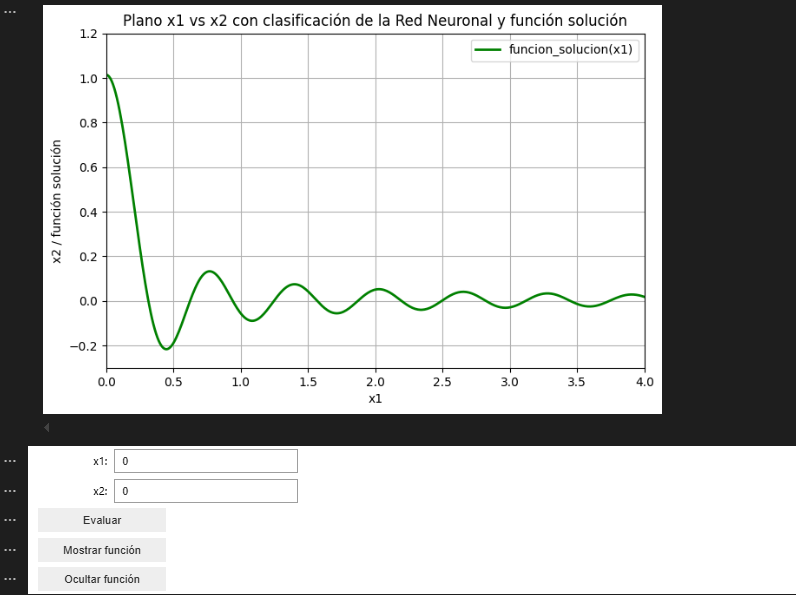